In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from scipy.stats import gaussian_kde
import numpy as np

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_pickle('quick_pick2')

In [3]:
df

,RGIId,CenLat_x,CenLon_x,Slope_x,Zmin_x,Zmed_x,Zmax_x,Area_x,Aspect_x,Lmax_x,Thickness,GLIMSId,BgnDate,EndDate,CenLon_y,CenLat_y,O1Region,O2Region,Area_y,Zmin_y,Zmax_y,Zmed_y,Slope_y,Aspect_y,Lmax_y,Status,Connect,Form,TermType,Surging,Linkages,Name,region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,avg predicted thickness,predicted thickness std dev,layer architecture,parameterization
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,3081,1841,12.0,30,41911,0,0,0,0,3,9,Black Rapids Glacier,01,282.635742,223.752106,159.993134,89.245750,229.779449,48.996700,230.333725,287.762207,223.083298,269.766327,48.996700,243.565048,48.996700,221.529037,96.186508,48.115826,235.491928,204.151291,48.996700,273.782776,285.346802,210.332809,266.681152,196.154892,236.091248,188.390701,86.624344,3-2,4
1,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,3081,1841,12.0,30,41911,0,0,0,0,3,9,Black Rapids Glacier,01,167.041489,218.813690,213.220764,180.237213,164.113312,48.996700,48.996700,48.996700,232.456039,240.190353,48.312271,180.177689,235.855209,48.996700,48.996700,279.453339,211.052475,154.971527,227.572937,229.531464,48.996700,165.013947,48.996700,159.171677,48.996700,147.966339,81.231194,4-2,4
2,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,3081,1841,12.0,30,41911,0,0,0,0,3,9,Black Rapids Glacier,01,45.414387,48.996700,135.327148,48.996700,167.195496,211.643524,176.937546,212.989563,163.294067,271.626343,249.546082,213.729202,218.673264,116.630684,175.335922,193.484909,218.634964,253.487915,225.921173,183.057709,264.855774,185.527298,261.251312,199.235229,225.483292,186.691055,64.943199,5-2,4
3,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,3081,1841,12.0,30,41911,0,0,0,0,3,9,Black Rapids Glacier,01,214.698151,48.996700,48.996700,147.995346,261.053040,228.311920,202.999542,214.255402,175.119507,253.784897,48.996700,265.045624,158.114578,228.547623,193.173431,212.521988,145.518799,228.308777,223.838715,231.608429,184.438110,48.996700,224.585968,198.588287,188.410339,183.076187,67.251045,6-2,4
4,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,3081,1841,12.0,30,41911,0,0,0,0,3,9,Black Rapids Glacier,01,222.285172,48.996700,191.651505,292.962311,277.264160,244.311783,183.275726,198.908310,252.453354,218.626541,211.055008,48.996700,48.996700,187.771835,227.990051,48.996700,48.972408,125.421562,244.986237,233.510101,48.996700,48.934727,224.674820,193.607285,213.092545,171.469528,84.260536,7-2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54896,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,G299645E62671S,19570101,-9999999,-60.354700,-62.670700,19,2,5.493,10,370,-999,6.7,273,3056,0,0,1,1,9,1,Johnsons Glacier,19,92.006432,90.650375,95.251045,64.372444,94.860771,96.520058,91.809494,95.898125,85.808067,95.423149,94.659370,94.020988,88.884911,91.493919,88.415764,93.330856,99.897644,95.893890,84.107040,98.249954,94.235741,93.406921,95.714302,92.971550,97.653358,92.221436,6.881921,16-15,4
54897,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,G299645E62671S,19570101,-9999999,-60.354700,-62.670700,19,2,5.493,10,370,-999,6.7,273,3056,0,0,1,1,9,1,Johnsons Glacier,19,92.560989,92.132080,96.114319,94.075027,99.987381,98.667458,87.480011,97.130287,97.414299,98.635796,96.871017,98.2453

In [4]:
def find_glacier_resid(df):

    dfr = pd.DataFrame()
    for i in (range(0,25,1)):
        x = pd.DataFrame(
                pd.Series(
                    (df[str(i)] - df['Thickness']),
                    name = 'Residual'
            )
        )
        
        x_ = pd.DataFrame(
                pd.Series(
                    (df[str(i)] - df['Thickness']) / df['Thickness'],
                    name = 'Percent Residual'
            )
        )
#         x_ = x.divide(df['Thickness'])
        y = pd.DataFrame(
            pd.Series(
                df['Thickness'],
                name = 'Thickness'
            )
        )
        l = pd.DataFrame(
            pd.Series(
                df['Lmax_x'],
                name = 'Lmax'
            )
        )
        a = pd.DataFrame(
            pd.Series(
                df['Area_x'],
                name = 'Area'
            )
        )

        s = pd.DataFrame(
            pd.Series(
                df['Slope_x'],
                name = 'Slope'
            )
        )

        e = pd.DataFrame(
            pd.Series(
                df['Zmin_x'],
                name = 'Zmin'
            )
        )

        r = pd.DataFrame(
            pd.Series(
                df['RGIId'],
                name = 'RGIId'
            )
        )
        

        f = pd.DataFrame(
            pd.Series(
                df['CenLon_x'],
                name = 'Lon'
            )
        )
        

        g = pd.DataFrame(
            pd.Series(
                df['CenLat_x'],
                name = 'Lat'
            )
        )
        h = pd.DataFrame(
            pd.Series(
                df['Zmax_x'],
                name = 'Zmax'
            )
        )
        

        j = pd.DataFrame(
            pd.Series(
                df['Aspect_x'],
                name = 'Aspect'
            )
        )
        dft = x.join(y)
        dft = dft.join(x_)
        dft = dft.join(l)
        dft = dft.join(a)
        dft = dft.join(s)
        dft = dft.join(e)
        dft = dft.join(r)
        dft = dft.join(f)
        dft = dft.join(g)
        dft = dft.join(h)
        dft = dft.join(j)

        dfr = pd.concat([dfr, dft])
    return dfr

In [14]:
# collect all residuals
dfpbs = df[df['layer architecture'] == '10-5']

dfr = find_glacier_resid(dfpbs)
# dfr['Percent Residual'] = dfr['Residual'] / dfr['Thickness']  * 100
# collect residuals for models from each glacier
res_min = pd.DataFrame()
res_max = pd.DataFrame()
for i in tqdm(dfpbs['RGIId'].unique()):
    dft = dfpbs[dfpbs['RGIId'] == i]
    f = find_glacier_resid(dft)
    rmin = pd.DataFrame(f.min()).T
    rmax = pd.DataFrame(f.max()).T
    res_min = pd.concat([res_min, rmin])
    res_max = pd.concat([res_max, rmax])

    
    


100%|██████████| 304/304 [00:50<00:00,  6.05it/s]


In [6]:
def findlog(x):
    if x > 0:
        log = math.log(x)
    elif x < 0:
        log = math.log(x*-1)*-1
    elif x == 0:
        log = 0
    return log

dfr['log residual'] = dfr['Percent Residual'].apply(
    lambda row: findlog(row)
)

In [7]:
res_max

,Residual,Thickness,Percent Residual,Lmax,Area,Slope,Zmin,RGIId,Lon,Lat,Zmax,Aspect
0,72.688934,235.0,0.309315,41911,234.583,12.0,722,RGI60-01.00037,-146.528168,63.469173,3081,30
0,10.577911,147.0,0.071959,8639,17.567,14.0,1162,RGI60-01.00570,-145.427,63.281,2438,172
0,81.128235,66.0,1.229216,6332,9.528,10.0,676,RGI60-01.01104,-134.349,58.38,1494,327
0,64.804871,66.0,0.981892,3374,5.859,14.0,2145,RGI60-01.16374,-140.302,61.2,2894,341
0,42.605148,70.0,0.608645,1181,0.872,15.3,2390,RGI60-02.03411,-116.33,51.177,2853,69
...,...,...,...,...,...,...,...,...,...,...,...,...
0,26.200729,59.0,0.44408,8560,8.376,29.0,2929,RGI60-17.14088,-70.0984,-33.0296,5894,358
0,20.996815,28.0,0.749886,1596,1.189,29.3,4664,RGI60-17.14647,-69.9276,-30.1454,5525,148
0,31.537506,39.0,0.808654,3349,3.14,16.0,4784,RGI60-17.15038,-69.7318,-28.5387,5597,190
0,13.912941,67.0,0.207656,3782,5.209,11.6,5068,RGI60-17.15087,-69.6091,-28.3814,5753,79


In [8]:
ml = []
for i in range(0,25,1):
    ml.append(str(i))

In [9]:
variances = pd.DataFrame()
for rgi_id in tqdm(df['RGIId'].unique()):
    temp_df = df[df['RGIId'] == rgi_id]
    x = pd.DataFrame(
            pd.Series(
                temp_df[ml].var(axis = 1),
                name = 'Variance'
        )
    )
    
#     print(x)
    a = pd.DataFrame(
        pd.Series(
            temp_df['Area_x'],
            name = 'Area'
        )
    )
    b = pd.DataFrame(
        pd.Series(
            temp_df['Slope_x'],
            name = 'Slope'
        )
    )
    c = pd.DataFrame(
        pd.Series(
            temp_df['Lmax_x'],
            name = 'Lmax'
        )
    )
    d = pd.DataFrame(
        pd.Series(
            temp_df['Zmin_x'],
            name = 'Zmin'
        )
    )
    e = pd.DataFrame(
        pd.Series(
            temp_df['Thickness'],
            name = 'Thickness'
        )
    )
    f = pd.DataFrame(
        pd.Series(
            temp_df['RGIId'],
            name = 'RGIId'
        )
    )
    g = pd.DataFrame(
        pd.Series(
            temp_df['Thickness'],
            name = 'Thickness'
        )
    )

#     print(y)
    another_temp_df = x.join(a)
#     print(dft)
#     another_temp_df = another_temp_df.join(a)
    another_temp_df = another_temp_df.join(b)
    another_temp_df = another_temp_df.join(c)
    another_temp_df = another_temp_df.join(d)
    another_temp_df = another_temp_df.join(e)
    another_temp_df = another_temp_df.join(f)
    variances = pd.concat([variances, another_temp_df])
variances

100%|██████████| 304/304 [00:02<00:00, 134.87it/s]


,Variance,Area,Slope,Lmax,Zmin,Thickness,RGIId
0,7503.777344,234.583,12.0,41911,722,235.0,RGI60-01.00037
1,6598.506836,234.583,12.0,41911,722,235.0,RGI60-01.00037
2,4217.619141,234.583,12.0,41911,722,235.0,RGI60-01.00037
3,4522.702637,234.583,12.0,41911,722,235.0,RGI60-01.00037
4,7099.838379,234.583,12.0,41911,722,235.0,RGI60-01.00037
...,...,...,...,...,...,...,...
54896,47.360836,5.493,6.7,3056,10,97.0,RGI60-19.02059
54897,16.662992,5.493,6.7,3056,10,97.0,RGI60-19.02059
54898,26.221781,5.493,6.7,3056,10,97.0,RGI60-19.02059
54899,19.434444,5.493,6.7,3056,10,97.0,RGI60-19.02059


In [10]:
minvar = pd.DataFrame()
maxvar = pd.DataFrame()
for i in tqdm(df['RGIId'].unique()):
    dft = df[df['RGIId'] == i]
    f = pd.Series(dft[ml].var(axis = 1),name = 'Variance')
    vmin = pd.DataFrame(
        pd.Series(
                f.min(),
                name = 'VarMin'
        )
    )
#     print(var_rmin)
    vmax = pd.DataFrame(
        pd.Series(
                f.max(),
                name = 'VarMax'
        )
    )
    rgi = pd.DataFrame(
        pd.Series(
                i,
                name = 'RGIId'
        )
    )
    a = pd.DataFrame(
        pd.Series(
                dft['Area_x'].min(),
                name = 'Area'
        )
    )
    b = pd.DataFrame(
        pd.Series(
                dft['Lmax_x'].min(),
                name = 'Lmax'
        )
    )
    c = pd.DataFrame(
        pd.Series(
                dft['Slope_x'].min(),
                name = 'Slope'
        )
    )
    d = pd.DataFrame(
        pd.Series(
                dft['Zmin_x'].min(),
                name = 'Zmin'
        )
    )
    e = pd.DataFrame(
        pd.Series(
                dft['Thickness'].min(),
                name = 'Thickness'
        )
    )
#     print(rgi)
    var_min = vmin.join(rgi)
    var_min = var_min.join(a)
    var_min = var_min.join(b)
    var_min = var_min.join(c)
    var_min = var_min.join(d)
    var_min = var_min.join(e)
    minvar = pd.concat([minvar,var_min])
    
    var_max = vmax.join(rgi)
    var_max = var_max.join(a)
    var_max = var_max.join(b)
    var_max = var_max.join(c)
    var_max = var_max.join(d)
    var_max = var_max.join(e)
    
    maxvar = pd.concat([maxvar,var_max])
#     var_rmax = pd.DataFrame(f.max())
#     var_res_min = pd.concat([var_res_min, var_rmin])
#     var_res_min = var_res_min.join(rgi)
#     var_res_max = pd.concat([var_res_max, var_rmax])
#     var_res_max = var_res_max.join(rgi)
#     break?

100%|██████████| 304/304 [00:03<00:00, 96.67it/s]


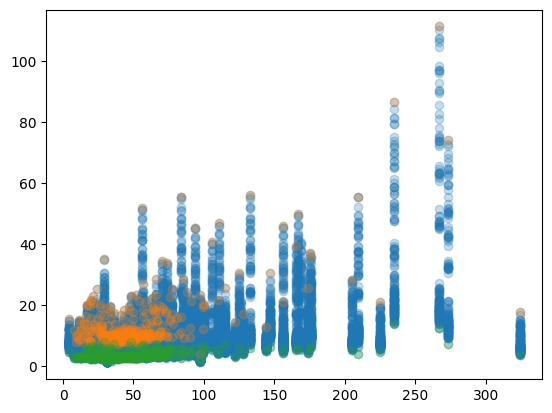

In [11]:
plt.scatter(
    variances['Thickness'],
    np.sqrt(variances['Variance']), alpha = 0.25
)
plt.scatter(
    maxvar['Thickness'],
    np.sqrt(maxvar['VarMax']), alpha = 0.25
)
plt.scatter(
    minvar['Thickness'],
    np.sqrt(minvar['VarMin']), alpha = 0.25
)

Text(0.5, 1.0, 'Layer Architecture 10-5')

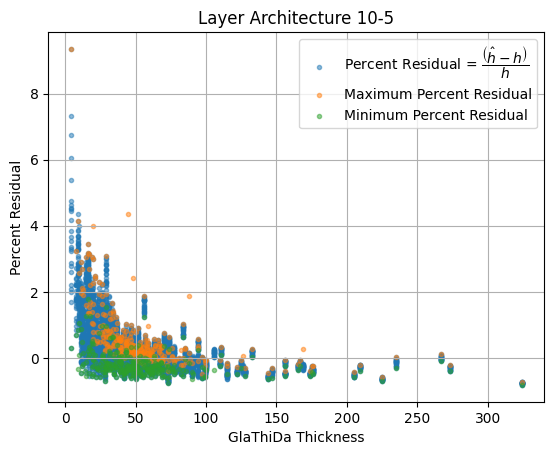

In [16]:
feat = 'Thickness'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
plt.scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5,
    label = 'Percent Residual = ' + r'$\dfrac{\left(\hat{h} - h\right)}{h}$'
#     color = 'red',
#     cmap = 'viridis'
)
plt.scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5,
    label = 'Maximum Percent Residual'
#     color = 'red',
#     cmap = 'viridis'
)
plt.scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5,
    label = 'Minimum Percent Residual'
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('GlaThiDa Thickness')
plt.ylabel('Percent Residual')
plt.legend()
# plt.yscale('log')
# plt.plot(x,model1(x),color = 'r')
# plt.plot(x,model2(x),color = 'r')
# plt.plot(x,model3(x),color = 'r',linestyle = '--')
plt.grid()

plt.title('Layer Architecture 10-5')

In [ ]:
x = (dfr['Percent Residual'])
from matplotlib.patches import Rectangle

# fig,ax = plt.subplots()
# plt.xscale('log')
# bins = np.logspace(findlog(np.min((x))), np.log10(np.max((x))), 25)
plt.hist(
    x,bins=25,log=True
)
# plt.xscale('symlog')
mean = np.mean(x)
plt.plot(
    (mean,mean),
    (0,5000),
    linestyle = '--',
    color = 'k',
    alpha = 0.75,
    label = 'Mean'
)
q75 = np.percentile(x, 75)
# plt.plot(
#     (q75,q75),
#     (0,5000),
#     linestyle = '-',
#     color = 'k',
#     alpha = 0.75,
# #     label = 'Mean'
# )
# plt.text(
#     q75+5,5000,'Q75'
# )
q25 = np.percentile(x, 25)
# plt.plot(
#     (q25,q25),
#     (0,5000),
#     linestyle = '-',
#     color = 'k',
#     alpha = 0.75
# )
# plt.text(
#     q25-75,5000,'Q25'
# )
plt.gca().add_patch(Rectangle((q25, 0), q75 - q25, 5000,
#              edgecolor = 'pink',
             facecolor = 'k',
                       alpha = 0.25,
             fill=True,
               label = 'IQR',
             lw=5))
# ax.add_patch(Rectangle((q25, 0), q75 - q25, 5000,
# #              edgecolor = 'pink',
#              facecolor = 'k',
#                        alpha = 0.25,
#              fill=True,
#                label = 'IQR',
#              lw=5))
plt.legend()
plt.xlabel('Percent Residual = ' + r'$\dfrac{\left(\hat{h} - h\right)}{h}$')
plt.ylabel('Percent Residual Frequency')
plt.title('Layer Architecture 10-5')
# plt.xlim(0,5000)

In [ ]:
x.max()

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

    
    
    
feat = 'Area'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][0].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Area (km$^2$)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][0].grid()

feat = 'Lmax'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][1].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[0][1].plot(x,model1(x),color = 'r')
ax[0][1].plot(x,model2(x),color = 'r')
ax[0][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][1].set_xlabel('Lmax (m)')
ax[0][1].set_xscale('log')
ax[0][1].grid()



feat = 'Slope'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][0].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
ax[1][0].plot(x,model1(x),color = 'r')
ax[1][0].plot(x,model2(x),color = 'r')
ax[1][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][0].set_xlabel('Slope (degrees)')
ax[1][0].grid()



feat = 'Zmin'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][1].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[1][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][1].plot(x,model1(x),color = 'r')
ax[1][1].plot(x,model2(x),color = 'r')
ax[1][1].set_xlabel('Min Elevation(m)')
ax[1][1].grid()

fig.supylabel('Residual (m)')
plt.tight_layout()
# plt.colorbar()

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

    
    
    
feat = 'Area'
minvar = minvar.sort_values(feat, ascending = True)
maxvar = maxvar.sort_values(feat, ascending = True)
x = minvar[feat].astype(float)
y = np.sqrt(variances['Variance'].astype(float))
y1 = np.sqrt(minvar['VarMin'].astype(float))
y2 = np.sqrt(maxvar['VarMax'].astype(float))
# dfr['log ' + feat] = np.log(variances[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][0].scatter(
    variances[feat],
    y,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    maxvar[feat],
    y2,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    minvar[feat],
    y1,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(variances[feat],y, 2))
ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Area (km$^2$)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][0].grid()

feat = 'Lmax'
minvar = minvar.sort_values(feat, ascending = True)
maxvar = maxvar.sort_values(feat, ascending = True)

x = minvar[feat].astype(float)
y = np.sqrt(variances['Variance'].astype(float))
y1 = np.sqrt(minvar['VarMin'].astype(float))
y2 = np.sqrt(maxvar['VarMax'].astype(float))# y1 = y1.astype(float)
# y2 = y2.astype(float)
# dfr['log ' + feat] = np.log(variances[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][1].scatter(
    variances[feat],
    y,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    maxvar[feat],
    y2,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    minvar[feat],
    y1,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(variances[feat], y, 2))
ax[0][1].plot(x,model1(x),color = 'r')
ax[0][1].plot(x,model2(x),color = 'r')
ax[0][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][1].set_xlabel('Maximum Length (m)')
ax[0][1].set_xscale('log')
ax[0][1].grid()



feat = 'Slope'
minvar = minvar.sort_values(feat, ascending = True)
maxvar = maxvar.sort_values(feat, ascending = True)
x = minvar[feat].astype(float)
y = np.sqrt(variances['Variance'].astype(float))
y1 = np.sqrt(minvar['VarMin'].astype(float))
y2 = np.sqrt(maxvar['VarMax'].astype(float))
# dfr['log ' + feat] = np.log(variances[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][0].scatter(
    variances[feat],
    y,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    maxvar[feat],
    y2,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    minvar[feat],
    y1,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
ax[1][0].plot(x,model1(x),color = 'r')
ax[1][0].plot(x,model2(x),color = 'r')
ax[1][0].plot(variances[feat],model3(variances[feat]),color = 'r',linestyle = '--')
ax[1][0].set_xlabel('Slope (degrees)')
ax[1][0].grid()



feat = 'Zmin'
minvar = minvar.sort_values(feat, ascending = True)
maxvar= maxvar.sort_values(feat, ascending = True)
x = minvar[feat].astype(float)
y = np.sqrt(variances['Variance'].astype(float))
y1 = np.sqrt(minvar['VarMin'].astype(float))
y2 = np.sqrt(maxvar['VarMax'].astype(float))
# dfr['log ' + feat] = np.log(variances[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][1].scatter(
    variances[feat],
    y,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    maxvar[feat],
    y2,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    minvar[feat],
    y1,
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(variances[feat],y, 2))
ax[1][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][1].plot(x,model1(x),color = 'r')
ax[1][1].plot(x,model2(x),color = 'r')
ax[1][1].set_xlabel('Min Elevation(m)')
ax[1][1].grid()
# ax[0][0].set_yscale('log')
# ax[0][1].set_yscale('log')
# ax[1][0].set_yscale('log')
# ax[1][1].set_yscale('log')
fig.supylabel('NCV Standard Deviation ${}^{P}_{}\sigma$ (m)')
plt.tight_layout()
# plt.colorbar()

In [ ]:

model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(variances[feat],y, 2))
ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Area (km$^2$)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

    
    
    
feat = 'Area'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][0].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Area (km$^2$)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][0].grid()

feat = 'Lmax'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][1].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[0][1].plot(x,model1(x),color = 'r')
ax[0][1].plot(x,model2(x),color = 'r')
ax[0][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][1].set_xlabel('Lmax (m)')
ax[0][1].set_xscale('log')
ax[0][1].grid()



feat = 'Slope'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][0].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
ax[1][0].plot(x,model1(x),color = 'r')
ax[1][0].plot(x,model2(x),color = 'r')
ax[1][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][0].set_xlabel('Slope (degrees)')
ax[1][0].grid()



feat = 'Zmin'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][1].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[1][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][1].plot(x,model1(x),color = 'r')
ax[1][1].plot(x,model2(x),color = 'r')
ax[1][1].set_xlabel('Min Elevation(m)')
ax[1][1].grid()

fig.supylabel('Percent Residual (m)')
plt.tight_layout()
# plt.colorbar()

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

    
    
    
feat = 'Lon'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][0].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
# ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Lon (deg)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][0].grid()

feat = 'Lat'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][1].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[0][1].plot(x,model1(x),color = 'r')
ax[0][1].plot(x,model2(x),color = 'r')
ax[0][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][1].set_xlabel('Lat (deg))')
# ax[0][1].set_xscale('log')
ax[0][1].grid()



feat = 'Aspect'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][0].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[1][0].plot(x,model1(x),color = 'r')
ax[1][0].plot(x,model2(x),color = 'r')
ax[1][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][0].set_xlabel('Aspect (deg)')
# ax[1][0].set_yscale('log')
# ax[1][0].set_xscale('log')
ax[1][0].grid()



feat = 'Zmax'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Residual'].astype(float)
y2 = res_max['Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][1].scatter(
    dfr[feat],
    dfr['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_max[feat],
    res_max['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_min[feat],
    res_min['Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Residual'], 2))
ax[1][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][1].plot(x,model1(x),color = 'r')
ax[1][1].plot(x,model2(x),color = 'r')
ax[1][1].set_xlabel('Maximum Elevation (m)')
ax[1][1].grid()

fig.supylabel('Residual (m)')
plt.tight_layout()
# plt.colorbar()

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

    
    
    
feat = 'Lon'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][0].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][0].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
# ax[0][0].set_xscale('log')
ax[0][0].set_xlabel('Lon (deg)')
ax[0][0].plot(x,model1(x),color = 'r')
ax[0][0].plot(x,model2(x),color = 'r')
ax[0][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][0].grid()

feat = 'Lat'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[0][1].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[0][1].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[0][1].plot(x,model1(x),color = 'r')
ax[0][1].plot(x,model2(x),color = 'r')
ax[0][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[0][1].set_xlabel('Lat (deg))')
# ax[0][1].set_xscale('log')
ax[0][1].grid()



feat = 'Aspect'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][0].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][0].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[1][0].plot(x,model1(x),color = 'r')
ax[1][0].plot(x,model2(x),color = 'r')
ax[1][0].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][0].set_xlabel('Aspect (deg)')
# ax[1][0].set_yscale('log')
# ax[1][0].set_xscale('log')
ax[1][0].grid()



feat = 'Zmax'
res_min = res_min.sort_values(feat, ascending = True)
res_max = res_max.sort_values(feat, ascending = True)
x = res_min[feat].astype(float)
y1 = res_min['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
# dfr['log ' + feat] = np.log(dfr[feat])
# xy = np.vstack(
#     [
#       dfr['log ' + feat], dfr['log Percent Residual']
#     ]
# )
# z = gaussian_kde(xy)(xy)
ax[1][1].scatter(
    dfr[feat],
    dfr['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_max[feat],
    res_max['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
ax[1][1].scatter(
    res_min[feat],
    res_min['Percent Residual'],
    marker = '.',
    alpha = 0.5
#     color = 'red',
#     cmap = 'viridis'
)
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(dfr[feat],dfr['Percent Residual'], 2))
ax[1][1].plot(x,model3(x),color = 'r',linestyle = '--')
ax[1][1].plot(x,model1(x),color = 'r')
ax[1][1].plot(x,model2(x),color = 'r')
ax[1][1].set_xlabel('Maximum Elevation (m)')
ax[1][1].grid()

fig.supylabel('Percent Residual (m)')
plt.tight_layout()
# plt.colorbar()

In [ ]:
res_min = res_min.sort_values('Thickness')
res_max = res_max.sort_values('Thickness')
dfr = dfr.sort_values('Thickness')

x1 = dfr['Thickness'].astype(float)
x2 = res_min['Thickness'].astype(float)

y1 = dfr['Percent Residual'].astype(float)
y2 = res_max['Percent Residual'].astype(float)
y3 = res_min['Percent Residual'].astype(float)

plt.scatter(
    x1,y1,
    alpha = 0.5,
    marker = '.',
#     label = 'Model Percent Residual'
)
plt.scatter(
    x2,
    y2,
    alpha = 0.5,
    marker = '.',
    label = 'Max Model Percent Residual'
)
plt.scatter(
    x2,
    y3,
    alpha = 0.5,
    marker = '.',
    label = 'Min Model Percent Residual'
)
model1 = np.poly1d(np.polyfit(x1, y1, 2))
model2 = np.poly1d(np.polyfit(x2, y2, 2))
model3 = np.poly1d(np.polyfit(x2, y3, 2))
plt.plot(x1,model1(x1),color = 'r',linestyle = '--')
plt.plot(x1,model2(x1),color = 'r')
plt.plot(x1,model3(x1),color = 'r')

plt.xlabel('GlaThida Thickness (m)')
plt.ylabel('Model Percent Residual (m)')
plt.title('Layer Architecture 10-5')
plt.grid()
# plt.legend()